In [2]:
import pandas as pd
from pathlib import Path

## Read all txt to describe data from TIMIT

In [45]:
tinit_files_path = []
for path in Path("F:\\downloads\\data").rglob("*.TXT"):
    if "TEST" in str(path) or "TRAIN" in str(path):
        tinit_files_path.append(str(path))

len(tinit_files_path)

6300

In [46]:
tinit_files_path[0].replace(".TXT", ".WAV")

'F:\\downloads\\data\\lisa\\data\\timit\\raw\\TIMIT\\TEST\\DR1\\FAKS0\\SA1.WAV'

In [47]:
tinit_files = []

for file_path in tinit_files_path:
    file_parts = file_path.split("\\")
    train_test, dialect, remaining = file_parts[8], file_parts[9], file_parts[10:]
    male_female, speaker_id = remaining[0][0], remaining[0][1:]
    text_type, sentence_number = remaining[1][:2], remaining[1][2:]

    with open(file_path, "r") as file:
        first_line = file.readline().strip()
        initial_sample, final_sample, text = first_line.split(" ", 2)

    file_data = {
        "full_path": file_path.replace(".TXT", ".WAV"),
        "train_test": train_test,
        "dialect": dialect,
        "male_female": male_female,
        "speaker_id": speaker_id,
        "text_type": text_type,
        "sentence_number": sentence_number,
        "initial_sample": initial_sample,
        "final_sample": final_sample,
        "text": text,
    }

    tinit_files_df = pd.DataFrame([file_data])
    tinit_files.append(tinit_files_df)

# Concatenate all the DataFrames in the files list into a single DataFrame
tinit_files_df = pd.concat(tinit_files, ignore_index=True)
tinit_files_df["full_path"] = tinit_files_df["full_path"].str.replace("\\", "\\\\")
tinit_files_df.to_csv("tinit_data_files_summary.csv", index=False)

# Now you have a single DataFrame containing all the data from the files_path.

## WaveFake

In [48]:
wavefake_files_path = []
for path in Path('F:\\downloads\\generated_audio').rglob('*.wav'):
    wavefake_files_path.append(str(path))

print(len(wavefake_files_path))
wavefake_df = pd.DataFrame(wavefake_files_path, columns=['full_path'])
wavefake_df["full_path"] = wavefake_df["full_path"].str.replace("\\", "\\\\")
wavefake_df['fake'] = 1
wavefake_df.to_csv('wavefake_data_files_summary.csv', index=False)

134266


## Mozilla Common Voice

In [49]:
mozilla_files_path = []
for path in Path('F:\\downloads\\en').rglob('*.mp3'):
    mozilla_files_path.append(str(path))

print(len(mozilla_files_path))
mozilla_df = pd.DataFrame(mozilla_files_path, columns=['full_path'])
mozilla_df["full_path"] = mozilla_df["full_path"].str.replace("\\", "\\\\")
mozilla_df['fake'] = 0
mozilla_df.to_csv('mozilla_data_files_summary.csv', index=False)

677020


In [4]:
import os

i = 0
for path in Path("F:\\downloads\\en").rglob("*.mp3"):
    if i % 10000 == 0:
        print(path, i)
    os.remove(path)
    i += 1

F:\downloads\en\clips\11ca2055816f0e248a9cf32ac0ce5099c5d658e2fed18d15ba937dba06a33422962752957a6f2f4f2ec4f96621dc9d2fb70857a4ab1fd5636178a79955f3946f.mp3 0
F:\downloads\en\clips\15a2436eee26f50325118869725074d7e8039d0849f48801a69e09dba094a499e6d5d05f5d0d9b574120f92305e26eee2e58cd94ad8d8c4bfacd976a439ac22e.mp3 10000
F:\downloads\en\clips\1973b51202b5ae1b66d591988646181c3064307ba3bcb974dcc73dc2a9073e9bf9576f9122f358bef967a55fda5d02c22f6912acc9281b9f98d34e6f0fa05862.mp3 20000
F:\downloads\en\clips\1d42b09c8d22f8f297dd85a8ddb87b49436ab1052d071068cc7d080cf0a5f79b8e71b45046d0037e42e21bb63f32bcac0c2a517bd4b66a68b0edd75f17ba8f7f.mp3 30000
F:\downloads\en\clips\2101c9f379fefcb14f144d9c80691460491b6167ea5d003b17558880aa49859832dc4cc6618d31205c01968fa532d78c2297be130d4a7a74bb6d979904bd2c85.mp3 40000
F:\downloads\en\clips\24c03376164c6a5c368dfa458d06946e1f59def2a253e00b5eca7783d87c87b6c9826fc4c5198bfcca9532ca06b1018c1b6172ccd54f25b286cd7f9a068de7d6.mp3 50000
F:\downloads\en\clips\287240a118c27046

In [77]:
remaining_list = []

wav_list = []
for path in Path("F:\\downloads\\en").rglob("*.wav"):
    wav_list.append(path)

print(len(wav_list))

mp3_list = []
for path in Path("F:\\downloads\\en").rglob("*.mp3"):
    mp3_list.append(path)

print(len(mp3_list))


637594
677020


In [78]:
%%time
remaining_list = []
mp3_set = set(mp3_list)
wav_set = set(wav_list)
for path in mp3_list:
    if not Path((str(path).replace('.mp3', '.wav'))) in wav_set:
        remaining_list.append(path)

print(len(remaining_list))

39426
CPU times: total: 7.11 s
Wall time: 7.11 s


In [79]:
%%time
from os import path
from pydub import AudioSegment
import subprocess
from subprocess import Popen
from itertools import zip_longest
from subprocess import Popen, STDOUT
from tqdm import tqdm

cmds = [f"ffmpeg -i {str(audio_file)} {str(audio_file).replace('.mp3', '.wav')}" for audio_file in remaining_list]

groups = [(Popen(cmd, shell=True) for cmd in cmds)] * 2000 # itertools' grouper recipe
for processes in tqdm(zip_longest(*groups)): # run len(processes) == limit at a time
    for p in filter(None, processes):
        p.wait()

0it [00:00, ?it/s]

20it [08:31, 25.57s/it]

CPU times: total: 1min 45s
Wall time: 8min 31s


In [80]:
mozilla_files_path = []
for path in Path('F:\\downloads\\en').rglob('*.wav'):
    mozilla_files_path.append(str(path))

print(len(mozilla_files_path))
mozilla_df = pd.DataFrame(mozilla_files_path, columns=['full_path'])
mozilla_df["full_path"] = mozilla_df["full_path"].str.replace("\\", "\\\\")
mozilla_df['fake'] = 0
mozilla_df.to_csv('mozilla_data_files_summary.csv', index=False)

676640


## LJSPeech

In [81]:
ljspeech_files_path = []
for path in Path('F:\downloads\LJSpeech-1.1').rglob('*.wav'):
    ljspeech_files_path.append(str(path))

print(len(ljspeech_files_path))
ljspeech_df = pd.DataFrame(ljspeech_files_path, columns=['full_path'])
ljspeech_df["full_path"] = ljspeech_df["full_path"].str.replace("\\", "\\\\")

ljspeech_df['fake'] = 0
ljspeech_df.to_csv('lsjspeech_data_files_summary.csv', index=False)

13100


## VAE Train Test

In [82]:
all_audios = pd.concat([tinit_files_df, wavefake_df, mozilla_df, ljspeech_df])
all_audios.head()

,full_path,train_test,dialect,male_female,speaker_id,text_type,sentence_number,initial_sample,final_sample,text,fake
0,F:\\downloads\\data\\lisa\\data\\timit\\raw\\T...,TEST,DR1,F,AKS0,SA,1.TXT,0,63488,She had your dark suit in greasy wash water al...,NaN
1,F:\\downloads\\data\\lisa\\data\\timit\\raw\\T...,TEST,DR1,F,AKS0,SA,2.TXT,0,58061,Don't ask me to carry an oily rag like that.,NaN
2,F:\\downloads\\data\\lisa\\data\\timit\\raw\\T...,TEST,DR1,F,AKS0,SI,1573.TXT,0,79565,His captain was thin and haggard and his beaut...,NaN
3,F:\\downloads\\data\\lisa\\data\\timit\\raw\\T...,TEST,DR1,F,AKS0,SI,2203.TXT,0,56218,The reasons for this dive seemed foolish now.,NaN
4,F:\\downloads\\data\\lisa\\data\\timit\\raw\\T...,TEST,DR1,F,AKS0,SI,943.TXT,0,60109,Production may fall far below expectations.,NaN


In [83]:
all_audios.shape

(830306, 11)

In [88]:
vae_train = all_audios.sample(frac=0.5)
vae_train[['full_path']].to_csv('vae_train.csv', index=False)

In [89]:
vae_val = all_audios[~all_audios['full_path'].isin(vae_train['full_path'])].sample(frac=0.4)
vae_val[['full_path']].to_csv('vae_val.csv', index=False)

In [90]:
vae_test = all_audios[
    ~(all_audios['full_path'].isin(vae_train['full_path']))&
    ~(all_audios['full_path'].isin(vae_val['full_path']))
]
print(vae_test.shape)
vae_test[['full_path']].to_csv('vae_test.csv', index=False)

(249092, 11)


In [91]:
vae_train.shape, vae_val.shape, vae_test.shape

((415153, 11), (166061, 11), (249092, 11))

## Rascunho

In [3]:
import pandas as pd
cls_train_ids_sample = pd.read_csv('cls_train_ids_sample.csv')
cls_train_ids_sample.head()

,full_path,fake
0,F:\\downloads\\en\\clips\\1e7483157086afa24ac1...,0
1,F:\\downloads\\LJSpeech-1.1\\wavs\\LJ006-0094.wav,0
2,F:\\downloads\\en\\clips\\0790b197e90511557dd8...,0
3,F:\\downloads\\en\\clips\\0a843fdd5b927dc34229...,0
4,F:\\downloads\\generated_audio\\ljspeech_hifiG...,1


In [4]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def audio_to_mel_spectrogram(audio_file_path, max_length=4*22500, sr=22500, n_mels=256):
    #audio_file_path = audio_file_path if type(audio_file_path) == str else audio_file_path.decode('ASCII')
    #audio_file_path = str(audio_file_path).replace('\\\\', os.sep)
    #audio_file_path = audio_file_path.replace('F:', '/mnt/f').replace('//', '/')
    
    with open(audio_file_path, 'rb') as fh:
        y, sr = librosa.load(fh, sr=sr)
    
    if len(y) > max_length:
        # If the audio is longer than the maximum length, cut it
        y = y[:max_length]
    elif len(y) < max_length:
        # If the audio is shorter, pad it with zeros
        pad_length = max_length - len(y)
        y = np.pad(y, (0, pad_length), mode='constant')
    
    # Calculate the Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_mels)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    
    return mel_spectrogram


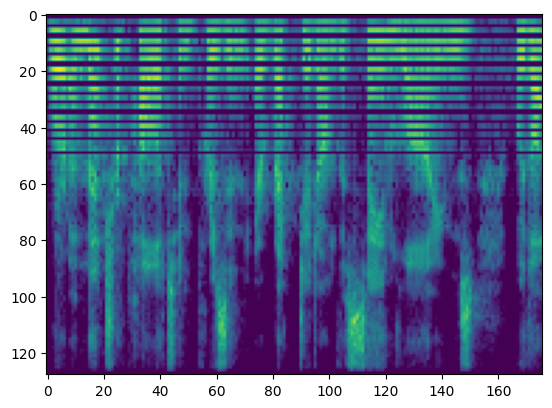

In [16]:
from matplotlib import pyplot as plt
plt.imshow(audio_to_mel_spectrogram(cls_train_ids_sample[cls_train_ids_sample['fake']==1]['full_path'].sample(n=1).values[0]))


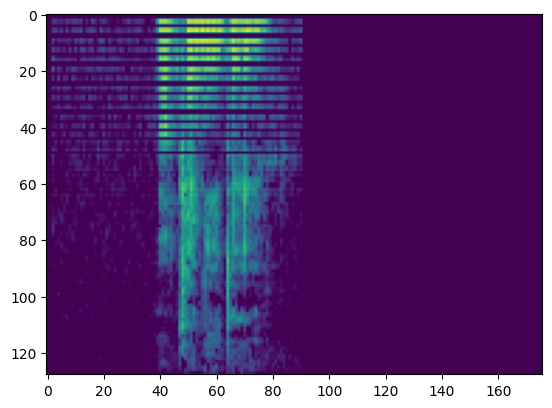

In [17]:
from matplotlib import pyplot as plt
plt.imshow(audio_to_mel_spectrogram(cls_train_ids_sample[cls_train_ids_sample['fake']==0]['full_path'].sample(n=1).values[0]))
